In [23]:
import numpy as np

SquareFootage = np.array([1100, 1400, 1425, 1550, 1600, 1700, 1750, 1800, 1875, 2000, 2100, 2250, 2300, 2400, 2450, 2600, 2800, 2900, 3000, 3150, 3300])

mu_sf = np.mean(SquareFootage)
sigma_sf = np.std(SquareFootage)
SquareFootage_scaled = (SquareFootage - mu_sf) / sigma_sf

ones = np.ones((len(SquareFootage_scaled), 1))
SquareFootage_reshaped = SquareFootage_scaled.reshape(-1, 1)

X = np.hstack((ones, SquareFootage_reshaped))

Price = np.array([199000, 245000, 230000, 215000, 280000, 295000, 345000, 315000, 325000, 360000, 350000, 385000, 390000, 425000, 415000, 455000, 465000, 495000, 510000, 545000, 570000])
Price_reshaped = Price.reshape(-1, 1)

mu_price = np.mean(Price_reshaped)
sigma_price = np.std(Price_reshaped)
y_true = (Price_reshaped - mu_price) / sigma_price

theta = np.array([0, 0])
theta = theta.reshape(-1, 1)

In [24]:
def cost_function(X, y, theta):
  return (1/42)*np.sum((np.dot(X, theta) - y_true)**2)

In [29]:
alpha = 0.0001
for epoch in range(1000000):
  theta = theta - (alpha/21)*(np.dot(X.T, (np.dot(X, theta) - y_true)))
print(cost_function(X, y, theta))
print(theta)

0.012726915574770358
[[-2.08166817e-16]
 [ 9.87191050e-01]]


In [32]:
new_square_footage = 2500
new_square_footage_scaled = (new_square_footage - mu_sf) / sigma_sf

new_X_predict = np.array([[1, new_square_footage_scaled]])

new_price_normalized = np.dot(new_X_predict, theta)
new_price = (new_price_normalized * sigma_price) + mu_price

print(new_price)

[[429560.55127243]]


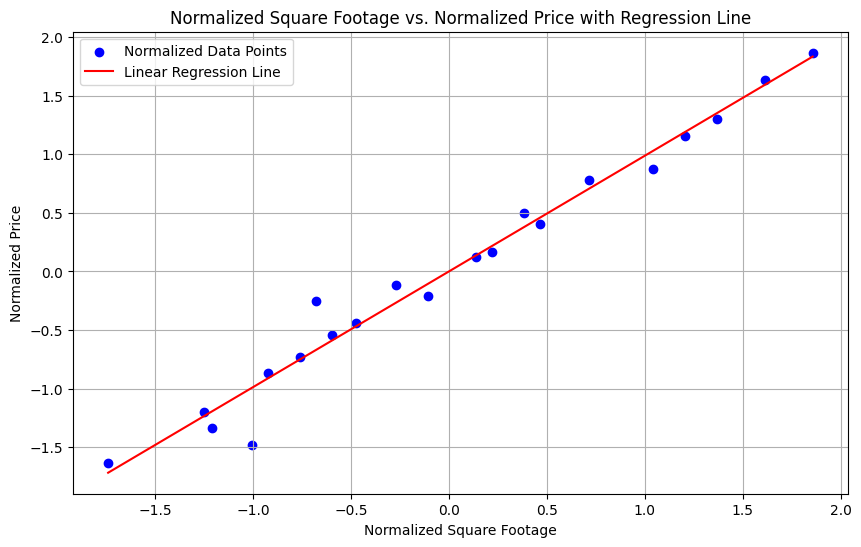

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(X[:, 1], y_true, label='Normalized Data Points', color='blue', marker='o')

y_pred = np.dot(X, theta)
plt.plot(X[:, 1], y_pred, label='Linear Regression Line', color='red')

plt.title('Normalized Square Footage vs. Normalized Price with Regression Line')
plt.xlabel('Normalized Square Footage')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()